In [1]:
import numpy as np
from numpy import genfromtxt

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def softmax(x):
    x = x/x.max()
    e_x = np.exp(x)
    return e_x / e_x.sum()

def test_loss(x_in, y_in, weights1, weights2, biases1, biases2):
        out1_temp = np.matmul(weights1.T, x_in[:,:])+biases1
        out1 = sigmoid(out1_temp)
        out2_temp = np.matmul(weights2.T, out1)+biases2
        out2 = sigmoid(out2_temp)
        loss = []
        for iter in range(out2.shape[1]):
            loss.append(cross_entropy(out2[:, iter], y_in[:, iter]))
        return np.mean(loss)

def pred_out(x_in, y_in, weights1, weights2, biases1, biases2):
        out1_temp = np.matmul(weights1.T, x_in[:,:])+biases1
        out1 = sigmoid(out1_temp)
        out2_temp = np.matmul(weights2.T, out1)+biases2
        out2 = sigmoid(out2_temp)
        return out2

def acc_out(x_in, y_in, weights1, weights2, biases1, biases2):
    pred = pred_out(x_in, y_in, weights1, weights2, biases1, biases2)
    sum_acc = 0
    for iter in range(pred.shape[1]):
#         print(iter)
        sum_acc+=(np.argmax(pred[:, iter])==np.argmax(y_in[:, iter]))
    return sum_acc/y_in.shape[1]

def cross_entropy(predictions, targets, epsilon=1e-5):
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    ce = - np.mean(np.multiply(np.log(predictions),targets)) 
    return ce

In [3]:
##Load and segregate the data
iris = genfromtxt('iris.csv', delimiter=',')
np.random.shuffle(iris)
x_in = iris[:, 0:4]

y_in = np.zeros(iris[:, 0:3].shape)
for iter in range(iris.shape[0]):
    y_in[iter, :] = [0, 0, 0]
    y_in[iter, int(iris[iter, 4])] = 1

In [4]:
x_train = x_in[0:int(x_in.shape[0]*0.7), :]
y_train = y_in[0:int(x_in.shape[0]*0.7), :]

x_test = x_in[int(x_in.shape[0]*0.7):x_in.shape[0], :]
y_test = y_in[int(x_in.shape[0]*0.7):x_in.shape[0], :]

In [5]:
hidden_size = 10
learning_rate = 0.001
num_epochs = 3000
alpha = 0.8

weights1 = np.random.uniform(1e-8, 1e-3,size=(x_in.shape[1], hidden_size))
weights2 = np.random.uniform(1e-8, 1e-3,size=(hidden_size, y_in.shape[1]))
print(weights1.shape)
print(weights2.shape)
biases1 = np.random.uniform(1e-8, 1e-3,size=(hidden_size, 1))
biases2 = np.random.uniform(1e-8, 1e-3,size=(y_in.shape[1], 1))

x_train = np.matrix(x_train)
x_train = x_train.T
y_train = np.matrix(y_train)
y_train = y_train.T

x_test = np.matrix(x_test)
x_test = x_test.T
y_test = np.matrix(y_test)
y_test = y_test.T

(4, 10)
(10, 3)


In [6]:
accuracies_train = []
accuracies_test = []
losses = []
test_losses = []

biases1_momentum = 0
biases2_momentum = 0
weights1_momentum = 0
weights2_momentum = 0

for epoch_num in range(num_epochs):
    if epoch_num%50==1:
        print("test_loss : ", test_losses[-1])
        print("train_loss : ", losses[-1])
        print("epoch_num : ", epoch_num)
    for sample_num in range(x_train.shape[1]):
#         print("sample_num : ", sample_num)
        #Forward propagation
        out1_temp = np.matmul(weights1.T, x_train[:,sample_num])+biases1
        out1 = sigmoid(out1_temp)
        out2_temp = np.matmul(weights2.T, out1)+biases2
        out2 = softmax(out2_temp)
        #Back-propogation
        error_out = out2-y_train[:, sample_num]
        err_2 = np.matrix(error_out)
        grad_2 = np.matmul(out1, err_2.T)
        err_1 = np.multiply(np.matmul(weights2, err_2), np.multiply(out1, np.ones(out1.shape)-out1))
        grad_1 = np.multiply(x_train[:, sample_num], err_1.T)
        #Updating the weights
        
        biases1_momentum = alpha*biases1_momentum-learning_rate*err_1
        biases2_momentum = alpha*biases2_momentum-learning_rate*err_2
        weights1_momentum = alpha*weights1_momentum-learning_rate*grad_1
        weights2_momentum = alpha*weights2_momentum-learning_rate*grad_2
        
        biases1 = biases1 + biases1_momentum
        biases2 = biases2 + biases2_momentum
        weights1 = weights1 + weights1_momentum
        weights2 = weights2 + weights2_momentum
        #Updating the accuracy and loss
        #End of for loop
#     print("accuracy : ", np.mean(acc_arr))
    test_losses.append(test_loss(x_test, y_test, weights1, weights2, biases1, biases2))
    accuracies_test.append(acc_out(x_test, y_test, weights1, weights2, biases1, biases2))
    accuracies_train.append(acc_out(x_train, y_train, weights1, weights2, biases1, biases2))
    losses.append(test_loss(x_train, y_train, weights1, weights2, biases1, biases2))
    

test_loss :  0.23056293052769467
train_loss :  0.23069774467088064
epoch_num :  1
test_loss :  0.22550599738818597
train_loss :  0.22480972389192416
epoch_num :  51
test_loss :  0.125938452973625
train_loss :  0.11222681129769363
epoch_num :  101
test_loss :  0.09122399273196141
train_loss :  0.06148796853567529
epoch_num :  151
test_loss :  0.08870863705413355
train_loss :  0.04586058541328012
epoch_num :  201
test_loss :  0.0838143221188532
train_loss :  0.0377556215443618
epoch_num :  251
test_loss :  0.06662266553192163
train_loss :  0.027985507405539088
epoch_num :  301
test_loss :  0.04675686857253566
train_loss :  0.01847383714304096
epoch_num :  351
test_loss :  0.031255847109852256
train_loss :  0.011158436696804486
epoch_num :  401
test_loss :  0.02257440533911925
train_loss :  0.0066891844011218015
epoch_num :  451
test_loss :  0.016915516925542943
train_loss :  0.004032792842668011
epoch_num :  501
test_loss :  0.012569999885595923
train_loss :  0.0024905202073963323
epoch_

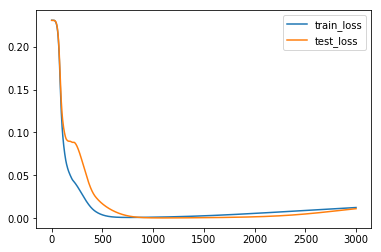

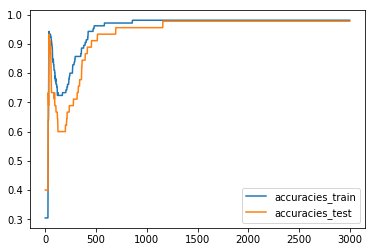

In [9]:
import matplotlib.pyplot as plt
# plt.subplot(211)
plt.plot(losses, label = 'train_loss')
plt.plot(test_losses, label = 'test_loss')
plt.legend()
plt.show()
# plt.subplot(212)
plt.plot(accuracies_train, label = 'accuracies_train')
plt.plot(accuracies_test, label = 'accuracies_test')
plt.legend()
plt.show()

In [8]:
print(acc_out(x_train, y_train, weights1, weights2, biases1, biases2))
print(acc_out(x_test, y_test, weights1, weights2, biases1, biases2))


0.9809523809523809
0.9777777777777777
